In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special
from matplotlib.colors import LogNorm
import scipy as sp
%matplotlib inline

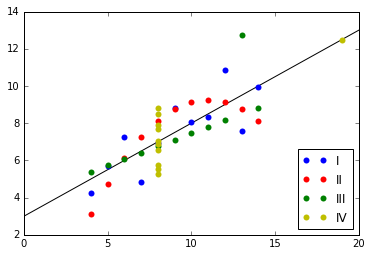

In [4]:
#Problem 1

#Get all our data
ansc=np.load("anscombe.npy")
first=ansc[:,0:2]
second=ansc[:,2:4]
third=ansc[:,4:6]
fourth=ansc[:,6:8]
x=np.linspace(0,20,100)

#Plot y=(x/2)+3
f=lambda x: x/2+3
plt.plot(x,f(x),"k")

#Plot I
plt.plot(first[:,0],first[:,1],"o",label="I",fillstyle="full", mew=0.0)
#Plot II
plt.plot(second[:,0],second[:,1],"ro",label="II", fillstyle="full", mew=0.0)
#Plot III
plt.plot(third[:,0],third[:,1],"go", label="III", fillstyle="full", mew=0.0)
#Plot IV
plt.plot(fourth[:,0],fourth[:,1],"yo", label="IV", fillstyle="full", mew=0.0)

#Show the plot
plt.legend(loc="lower right")
plt.show()

#Description:
#Each of the scatter plots are centered at the line y=(1/2x)+3,
#and it is easy to see that they have all the same numerical
#descriptions of a data set (mean, variance, correlation, etc)
#but they do not express the same types of data. Some of them
#(for example, data set III) have some points with very little variance
#and some points with a lot of variance. Other data sets, such as set II,
#have pretty uniform variance between each point. Also, set IV has a distant
#outlier that goes unnoticed by numerical means.

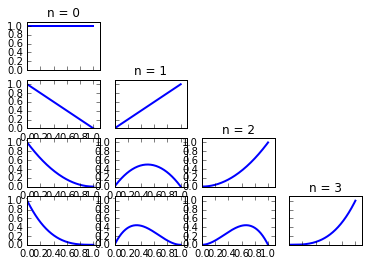

In [5]:
#Problem 2

#Define variables
B = lambda x: sp.special.binom(n,v)*(x**v)*((1-x)**(n-v))
x = np.linspace(-1, 1, 200)

#Plot Bernstein polynomials
for n in range(4):
    for v in xrange(n+1):
        plt.subplot(4, 4, (1+4*n)+v) 
        plt.plot(x, B(x), lw=2)
        plt.axis([0.0, 1.1, 0.0, 1.1])
    
    # Turn off extra tick marks and axis labels.
    plt.tick_params(which="both", top="off", right="off")
    if n < 6: # Remove x-axis label on upper plots.
        plt.tick_params(labelbottom="off")
    if n % 2: # Remove y-axis label on right plots.
        plt.tick_params(labelleft="off")
    plt.title("n = "+str(n))

#Show
plt.show()

In [6]:
#Problem 3

#Define variables
mlb=np.load("MLB.npy")
height=mlb[:,0]
weight=mlb[:,1]
age=mlb[:,2]

#Line of best fit function
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b


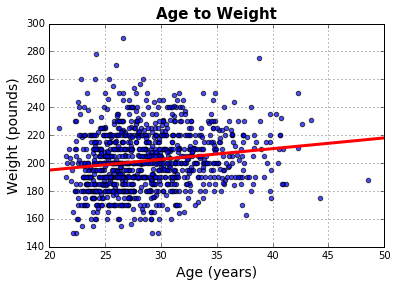

In [7]:
#AGE TO WEIGHT

#Graph
plt.scatter(age, weight, alpha=.7)
plt.grid()

#Labels
plt.title("Age to Weight", fontsize=15, weight="bold")
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Weight (pounds)", fontsize=14)
plt.axis([20, 50, 140, 300])

#Best fit
b,m=best_fit(age,weight)
domain=np.linspace(20,50,len(height))
plt.plot(domain,m*domain+b,"r", lw=3)

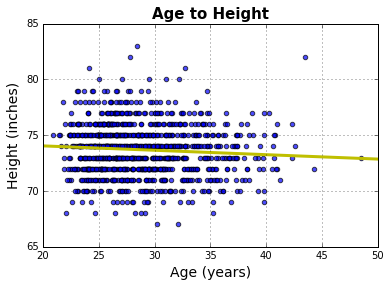

In [8]:
#AGE TO HEIGHT

#Graph
plt.scatter(age, height, alpha=.7)
plt.grid()

#Labels
plt.title("Age to Height", fontsize=15, weight="bold")
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Height (inches)", fontsize=14)
plt.axis([20, 50, 65, 85])

#Best fit
b,m=best_fit(age,height)
domain=np.linspace(20,50,len(height))
plt.plot(domain,m*domain+b,"y", lw=3)

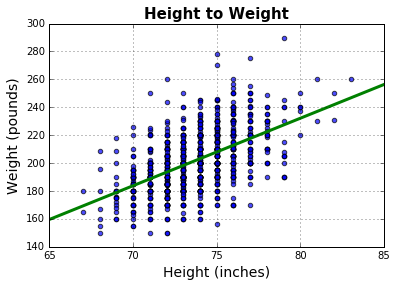

In [9]:
#HEIGHT TO WEIGHT

#Graph
plt.scatter(height, weight, alpha=.7)
plt.grid()

#Labels
plt.title("Height to Weight", fontsize=15, weight="bold")
plt.xlabel("Height (inches)", fontsize=14)
plt.ylabel("Weight (pounds)", fontsize=14)
plt.axis([65, 85, 140, 300])

#Best fit
b,m=best_fit(height,weight)
domain=np.linspace(65,85,len(height))
plt.plot(domain,m*domain+b,"g", lw=3)

In [10]:
#Problem 4
#Get variables
date, magnitude, longitude, latitude=np.load("earthquakes.npy").T

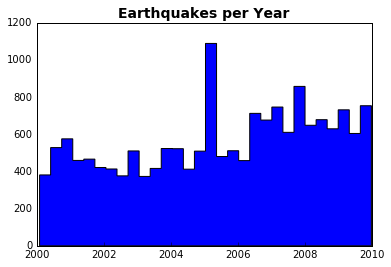

In [11]:
#Earthquakes per Year
plt.hist(date, bins=30, histtype="stepfilled")
plt.tick_params(left="off", top="off", right="off")
plt.title("Earthquakes per Year", fontsize=14, weight="bold")

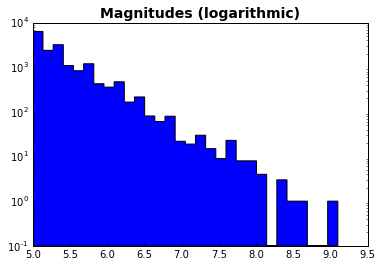

In [12]:
#Magnitudes of Earthquakes
plt.hist(magnitude, bins=30, histtype="stepfilled", log=True)
plt.tick_params(left="off", top="off", right="off")
plt.title("Magnitudes (logarithmic)", fontsize=14, weight="bold")

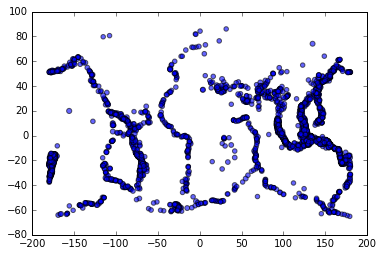

In [13]:
#Latitude v. Longitude
plt.scatter(longitude[::5], latitude[::5], s=magnitude*4, alpha=.6)

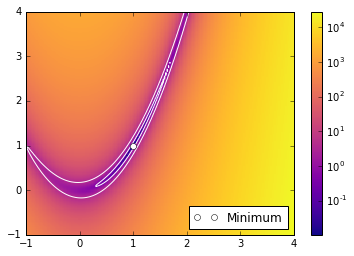

In [14]:
#Problem 5
#Define variables
x=np.linspace(-1,4,200)
X, Y = np.meshgrid(x, x.copy())
Z = (1-X)**2 + 100*(Y-X**2)**2

plt.contour(X, Y, Z, [.5, 4], colors="white", lw=.5)
plt.pcolormesh(X, Y, Z, cmap="plasma", norm=LogNorm())
plt.colorbar()

#Min point
minx=[1]
miny=[1]
plt.plot(minx, miny, "ow", label="Minimum")
plt.legend(loc="lower right")

In [15]:
#Problem 6 (until end of code_)
#Get data
from matplotlib.colors import LogNorm
population, GDP, male_height, female_height=np.load("countries.npy").T
countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]

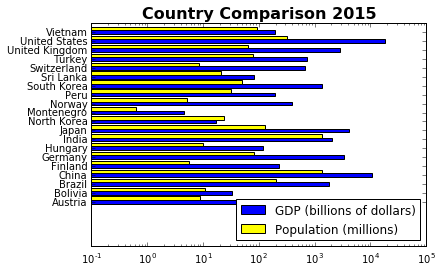

In [16]:
#Population to GDP (Bar graph)

#Format correctly
positions=np.arange(len(countries))
width = 0.4
fig, ax = plt.subplots()

#Plot
ax.barh(positions - width/2, GDP, width, color='blue', label='GDP (billions of dollars)', log=True)
ax.barh(positions + width/2, population, width, color='yellow', label='Population (millions)', log=True)
plt.yticks(positions, countries)


#Formatting
plt.title("Country Comparison 2015", fontsize=16, weight="bold")
plt.legend(loc="lower right")

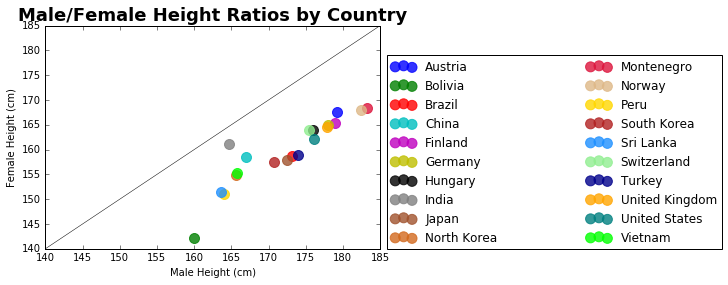

In [17]:
#Male/Female Height Ratio by Country (Scatterplot)

#Get colors
c=["b","g","r","c","m",'y','k','grey','sienna','chocolate','crimson','burlywood',
  'gold','firebrick','dodgerblue','lightgreen','darkblue','orange','teal','lime']

#plots
for i in xrange(len(male_height)):
    plt.scatter(male_height[i], female_height[i], 
                color= c[i], label=countries[i], 
                s=100, alpha=.8)
x=np.linspace(140,190,100)
plt.plot(x,x,"k",lw=0.5)

#Legend, Axes, Title
plt.title("Male/Female Height Ratios by Country", fontsize=18, weight="bold")
plt.axis([140,185,140,185],"equal")
plt.xlabel("Male Height (cm)")
plt.ylabel("Female Height (cm)")
plt.legend(bbox_to_anchor=(1.02, 0., 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

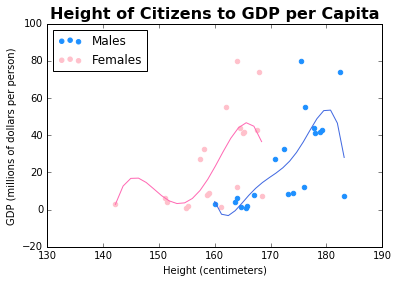

In [18]:
#How Height affects GDP (Scatterplot)
import numpy.polynomial.polynomial as poly

m=plt.scatter(male_height,GDP/population, color="dodgerblue", norm=LogNorm(), label="Males")
f=plt.scatter(female_height,GDP/population,color="pink", norm=LogNorm(), label="Females")

#Polynomials of best fit
xw=np.linspace(min(female_height),max(female_height),len(female_height))
xm=np.linspace(min(male_height),max(male_height),len(male_height))
womancoeffs = poly.polyfit(female_height, GDP/population, 4)
mancoeffs = poly.polyfit(male_height, GDP/population, 5)
ffitw = poly.polyval(xw, womancoeffs)
ffitm = poly.polyval(xm, mancoeffs)
plt.plot(xw, ffitw, color="hotpink")
plt.plot(xm, ffitm, color="royalblue")


#Legend, Show
plt.title("Height of Citizens to GDP per Capita", fontsize=16, weight="bold")
plt.legend(loc="upper left")
plt.xlabel("Height (centimeters)")
plt.ylabel("GDP (millions of dollars per person)")
plt.show()

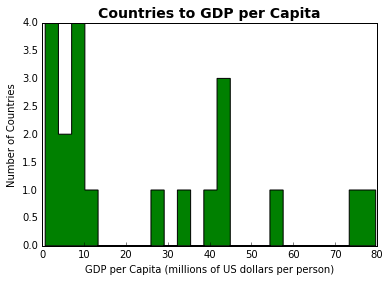

In [19]:
#GDP Quantity (Histogram)
plt.hist(GDP/population, bins=25, histtype="stepfilled", color="green")
plt.tick_params(left="off", top="off", right="off")

#Titles
plt.title("Countries to GDP per Capita", fontsize=14, weight="bold")
plt.xlabel("GDP per Capita (millions of US dollars per person)")
plt.ylabel("Number of Countries")